## Selective Search 예제

#### 필요한 패키지 설치

In [7]:
!pip install opencv-contrib-python
# 커널 재시작 해야함

  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/32/9e/4dcc0bb70e3b365dc85b8f96c63e6a306653f7cc6ed061aa6cc7b2bddee7/opencv_contrib_python-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 4.4 MB/s eta 0:00:00:00:0100:01m

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [2]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

### segmetation 데모

In [28]:
color = [np.random.randint(0, 256) for _ in range(3)]
visual = np.zeros((10, 10, 3), dtype=np.uint8)
visual[0,0] = color 
visual[0,0]

array([ 82,  76, 243], dtype=uint8)

In [9]:
def graph_segmentation_demo(image_path, sigma=0.5, k=300, min_size=1000):
    # Load the image
    image = cv2.imread(image_path)

    # Create the GraphSegmentation object
    gs = cv2.ximgproc.segmentation.createGraphSegmentation()

    # Set the sigma, k, and min_size parameters
    # sigma : The sigma parameter, used to smooth image
    # k     : The k parameter of the algorythm
    # min_size : The minimum size of segments
    gs.setSigma(sigma)
    gs.setK(k)
    gs.setMinSize(min_size)

    # Process the image
    print(image.shape)
    segments = gs.processImage(image)
    print(segments.shape)

    # Create a color image to visualize the segmentation
    visual = np.zeros((segments.shape[0], segments.shape[1], 3), dtype=np.uint8)
    segment_ids = np.unique(segments)
    print(segment_ids)
    for segment_id in segment_ids:
        visual[segments == segment_id] = [np.random.randint(0, 256) for _ in range(3)]

    return visual

(400, 600, 3)
(400, 600)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


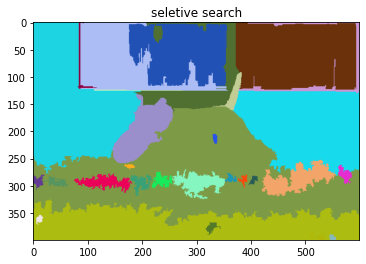

In [61]:
image_path = "images/dog.jpg"
visual = graph_segmentation_demo(image_path,0.1,4000,100)
plt_imshow("seletive search", visual)

### selective search를 이용한 region proposal

In [62]:
def selective_search_demo(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Create a Selective Search Segmentation Object using the default graph-based model
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)
    

    # Choose the segmentation method (fast or quality)
    ss.switchToSelectiveSearchFast()

    # Run selective search and get the region proposals
    rects = ss.process()
    print(f"Total Region Proposals: {len(rects)}")
    print(rects)

    # Visualize a subset of region proposals
    num_show_rects = 100
    clone = image.copy()
    for i, rect in enumerate(rects):
        if i < num_show_rects:
            x, y, w, h = rect
            cv2.rectangle(clone, (x, y), (x+w, y+h), (0, 255, 0), 2)
        else:
            break

    return clone

Total Region Proposals: 1219
[[  0   0 597 166]
 [223 198  23  12]
 [285 308  12  16]
 ...
 [  0   0 600 349]
 [  0   0 600 335]
 [  0 254 600 146]]


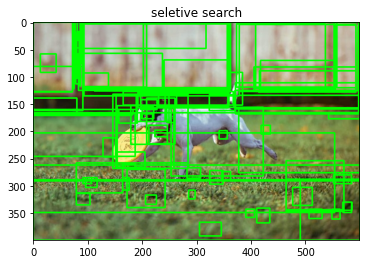

In [63]:
image_path = "images/dog.jpg"
visual = selective_search_demo(image_path)
plt_imshow("seletive search", visual)

### 객체 감지를 위한 OpenCV 선택적 검색

In [65]:
args = {
    "image": "images/dog.jpg",
    "method": "fast"
}

In [66]:
# load the input image
image = cv2.imread(args["image"])

# initialize OpenCV's selective search implementation and set the
# input image
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)

# check to see if we are using the *fast* but *less accurate* version
# of selective search
if args["method"] == "fast":
    print("[INFO] using *fast* selective search")
    ss.switchToSelectiveSearchFast()

# otherwise we are using the *slower* but *more accurate* version
else:
    print("[INFO] using *quality* selective search")
    ss.switchToSelectiveSearchQuality()

[INFO] using *fast* selective search


In [67]:
# run selective search on the input image
start = time.time()
rects = ss.process()
end = time.time()

# show how along selective search took to run along with the total
# number of returned region proposals
print("[INFO] selective search took {:.4f} seconds".format(end - start))
print("[INFO] {} total region proposals".format(len(rects)))

[INFO] selective search took 1.8984 seconds
[INFO] 1219 total region proposals


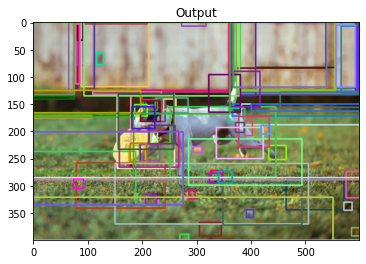

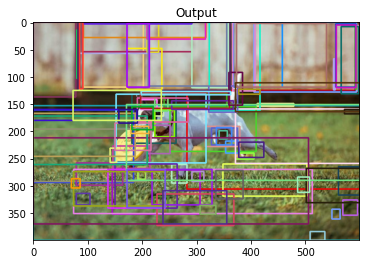

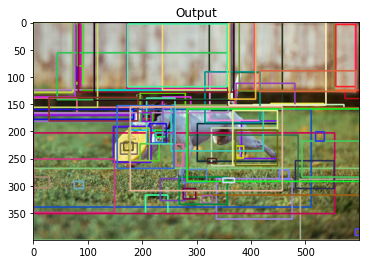

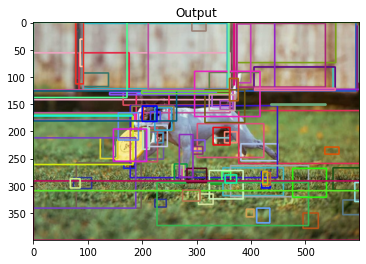

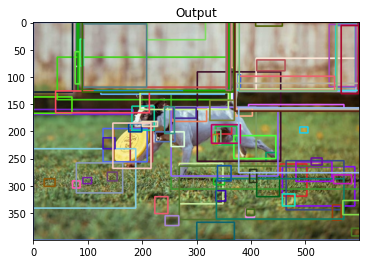

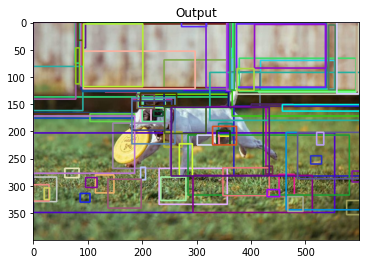

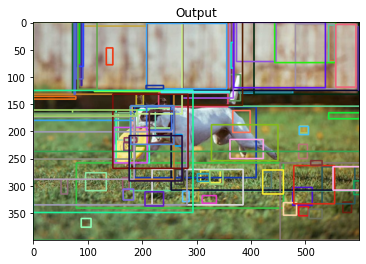

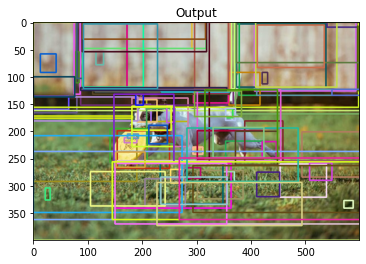

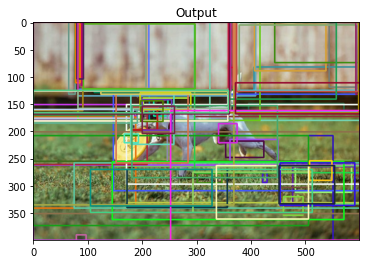

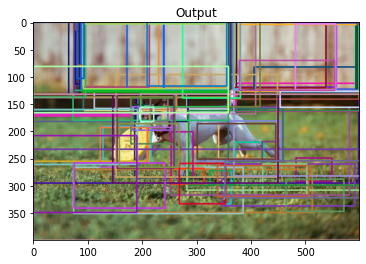

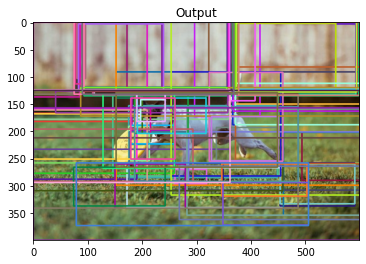

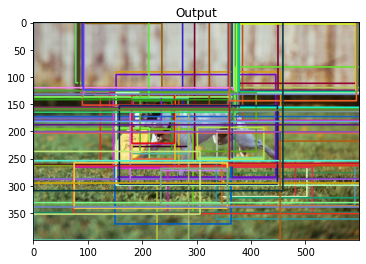

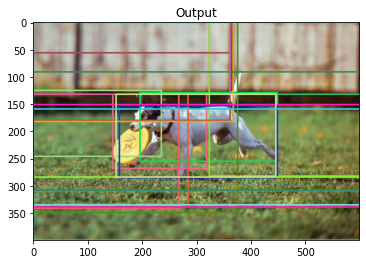

In [68]:
# loop over the region proposals in chunks (so we can better
# visualize them)
for i in range(0, len(rects), 100):
    # clone the original image so we can draw on it
    output = image.copy()

    # loop over the current subset of region proposals
    for (x, y, w, h) in rects[i:i + 100]:
        # draw the region proposal bounding box on the image
        color = [random.randint(0, 255) for j in range(0, 3)]
        cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)

    # show the output image
    plt_imshow("Output", output)